In [1]:
from src.Sonufy import *
from src.AudioDataGenerator import AudioDataGenerator
import matplotlib.pyplot as plt

In [2]:
adg = AudioDataGenerator(batch_size=32, input_size=(64,1030), output_size=(64,64), directory='data/mels')

Found 36926 files for prediction set


In [3]:
sonufy = Sonufy(latent_dims=128, output_size=(64,64))

In [4]:
sonufy.build_model(filters=(16,32,64))

In [61]:
sonufy.train(mel_directory='data/mels', epochs=10, train_test_split=.02, batch_size=128)

Found 46572 files for training set
Found 951 files for testing set
Epoch 1/10
363/363 [==============================] - 94s 257ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 2/10
363/363 [==============================] - 96s 264ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 3/10
363/363 [==============================] - 99s 271ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 4/10
363/363 [==============================] - 98s 271ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 5/10
363/363 [==============================] - 98s 269ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 6/10
363/363 [==============================] - 94s 260ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 7/10
363/363 [==============================] - 92s 253ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 8/10
363/363 [==============================] - 92s 253ms/step - loss: 0.0055 - val_loss: 0.0058
Epoch 9/10
363/363 [==============================] - 91s 249ms/step - loss: 0.0055 - val_loss: 0.0056
Epoch 

In [62]:
sonufy.save_encoder('data/test_128dim_newmels')
# sonufy.load_encoder('data/test_128dim_256filters')
sonufy.build_vectors_from_model(mel_directory='data/mels', all_tracks_file='data/all_tracks_shuffled.feather')
sonufy.save('data/test_128dim_newmels')

2022-09-06 15:25:04.560 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 6). These functions will not be directly callable after loading.
2022-09-06 15:25:04.814 INFO    tensorflow: Assets written to: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmp041v5n6q/assets
2022-09-06 15:25:05.878633: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-09-06 15:25:05.878842: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-09-06 15:25:05.880146: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmp041v5n6q
2022-09-06 15:25:05.884114: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-09-06 15:25:05.884124: I tens

Encoder saved to "data/test_128dim_newmels".
Getting predictions from autoencoder...


INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


[============================================================>] 48789 / 48789

1.36 minutes elapsed
Building tracks dataframe...
Track dataframe built. 0.06 minutes elapsed
Building genre distributions...
[============================================================>] 48789 / 48789

Genre distributions built. 0.28 minutes elapsed
Latent Space Built.


2022-09-06 15:26:53.064 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 10). These functions will not be directly callable after loading.
2022-09-06 15:26:53.737 INFO    tensorflow: Assets written to: data/test_128dim_newmels/assets


Model saved to "data/test_128dim_newmels".
saved full model


2022-09-06 15:26:54.711 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 6). These functions will not be directly callable after loading.
2022-09-06 15:26:54.904 INFO    tensorflow: Assets written to: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmptsw8i7ox/assets


Encoder saved to "data/test_128dim_newmels".
saved encoder
saved database files
Saved full model, encoder, and database files in data/test_128dim_newmels.


2022-09-06 15:26:55.846274: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-09-06 15:26:55.846316: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-09-06 15:26:55.846605: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmptsw8i7ox
2022-09-06 15:26:55.850476: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-09-06 15:26:55.850490: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmptsw8i7ox
2022-09-06 15:26:55.863006: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-09-06 15:26:55.922042: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmptsw8i7ox
2022-09-

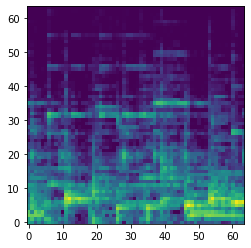

In [63]:
test_img = adg.take(3)[0]

plt.imshow(test_img[0], origin='lower')

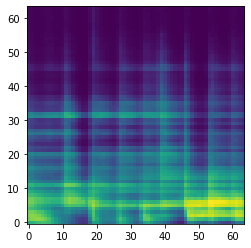

In [64]:
plt.imshow(sonufy.autoencoder(test_img)[0], origin='lower')

In [65]:
a, b, c, d = sonufy.search_for_recommendations(query='otis redding', get_time_and_freq=True)

INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [66]:
a['name']

"(Sittin' On) the Dock of the Bay"

In [67]:
b

,track_name,track_uri,artist_name,similarity,track_popularity,time_similarity,frequency_similarity
0,Godnatsangen - nu er dagen igen forbi,spotify:track:00Bc1ksconCAfnRGjCkU36,Povl Kjøller,0.728898,16,0.775793,0.707526
1,Saving Words For Making Sense,spotify:track:1t71mp3aGnBhxYj6hsjLER,The Six Parts Seven,0.709825,29,0.702697,0.740921
2,"Waste (Dave Matthews, solo)",spotify:track:77tdraaU0kGmwqEzBGVhhN,Dave Matthews,0.690904,44,0.611824,0.740123
3,Whisper In Her Ear,spotify:track:5YuHMfznSrE6qsKGQzcAnO,The Milk Carton Kids,0.680470,46,0.715741,0.665280
4,Afternoon Cha Cha,spotify:track:1kPuH7qlVupIVlwY5y6xIN,Young & Rollins,0.679236,15,0.715538,0.714935
5,Whatevershebringswesing - 1999 Remaster,spotify:track:0p134il4SQJBuuxc8VOjop,Kevin Ayers,0.676427,30,0.582479,0.739618
6,Aerial Bounds,spotify:track:430QSKg3CErr6IgT14bhOy,Berdon Kirksaether,0.672587,24,0.574469,0.740749
7,Hujedamig sånt barn han var,spotify:track:5CjshrRlnEnF9GCjUghFLZ,Stefan Sundström,0.670641,19,0.568467,0.715828
8,Momo's,spotify:track:6sZQyx63X4cUvXV7Uw1YBw,Connan Mockasin,0.670487,38,0.521236,0.805782
9,Hot House,spotify:track:5fGTAvOMgucBP6xyPGwHza,Barry Harris,0.669654,15,0.586422,0.706842


In [68]:
similarity_img = np.concatenate([np.array(d), np.array(c[sonufy.latent_cols])])

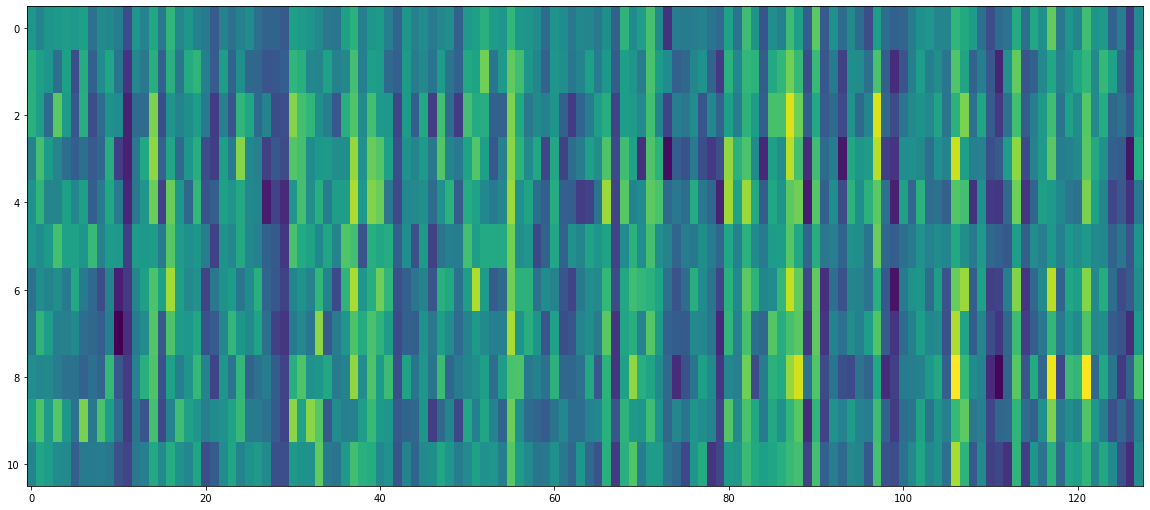

In [69]:
plt.figure(figsize=(20,10))
plt.imshow(similarity_img, aspect=5)

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [71]:
mean_squared_error(test_img[0].reshape(64,64), np.array(sonufy.autoencoder(test_img)[0]).reshape(64,64))

0.008464583422193032